# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Place those cities into a dataframe
cities_df = pd.DataFrame({"city": cities})

#Create empty columns for the data we want to retrieve from the API
cities_df['country'] = ''
cities_df['lat'] = ''
cities_df['lng'] = ''
cities_df['humidity'] = ''
cities_df['temp'] = ''
cities_df['max_temp'] = ''
cities_df['clouds'] = ''
cities_df['wind'] = ''


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Grab base url
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='

for index, row in cities_df.iterrows():
    
    city_search = row['city']
    
    #Create full url with imperial units
    full_url = f"{base_url}{city_search}&appid={api_key}&units=imperial"
    
    #Make the api request
    weather = requests.get(full_url).json()

    #Append values requested to the data frame
    try:
        print(f"Requesting data for {city_search}...")
        cities_df.loc[index, 'country'] = weather['sys']['country']
        cities_df.loc[index, 'lat'] = weather['coord']['lat']
        cities_df.loc[index, 'lng'] = weather['coord']['lon']
        cities_df.loc[index, 'humidity'] = weather['main']['humidity']
        cities_df.loc[index, 'temp'] = weather['main']['temp']
        cities_df.loc[index, 'max_temp'] = weather['main']['temp_max']
        cities_df.loc[index, 'clouds'] = weather['clouds']['all']
        cities_df.loc[index, 'wind'] = weather['wind']['speed']
    #If missing values, indicate with print statement
    except(KeyError, IndexError):
        print(f"{city_search} is missing field(s) ... skipping")


Requesting data for georgetown...
Requesting data for yanan...
yanan is missing field(s) ... skipping
Requesting data for cape town...
Requesting data for kapaa...
Requesting data for nelson bay...
Requesting data for east london...
Requesting data for hermanus...
Requesting data for kalmunai...
Requesting data for vao...
Requesting data for adilabad...
Requesting data for ilmajoki...
Requesting data for rikitea...
Requesting data for amparai...
amparai is missing field(s) ... skipping
Requesting data for vaitupu...
vaitupu is missing field(s) ... skipping
Requesting data for punta arenas...
Requesting data for belushya guba...
belushya guba is missing field(s) ... skipping
Requesting data for mount gambier...
Requesting data for sungaipenuh...
Requesting data for nuevo progreso...
Requesting data for ancud...
Requesting data for ushuaia...
Requesting data for derzhavinsk...
Requesting data for cabo san lucas...
Requesting data for busselton...
Requesting data for tuktoyaktuk...
Reques

Requesting data for boa vista...
Requesting data for mumford...
Requesting data for honggang...
Requesting data for sehithwa...
Requesting data for aykhal...
Requesting data for dikson...
Requesting data for samusu...
samusu is missing field(s) ... skipping
Requesting data for port hedland...
Requesting data for sistranda...
Requesting data for saint andrews...
Requesting data for torbay...
Requesting data for taoudenni...
Requesting data for ruatoria...
ruatoria is missing field(s) ... skipping
Requesting data for bressuire...
Requesting data for geraldton...
Requesting data for hornepayne...
Requesting data for udachnyy...
Requesting data for hofn...
Requesting data for vilyuysk...
Requesting data for bosaso...
Requesting data for carnarvon...
Requesting data for klaksvik...
Requesting data for yeniseysk...
Requesting data for nishihara...
Requesting data for takoradi...
Requesting data for sandy bay...
Requesting data for barrow...
Requesting data for thinadhoo...
Requesting data fo

Requesting data for chunhuhub...
Requesting data for deh rawud...
deh rawud is missing field(s) ... skipping
Requesting data for gobabis...
Requesting data for livingston...
Requesting data for eucaliptus...
Requesting data for rudnya...
Requesting data for eureka...
Requesting data for luganville...
Requesting data for port lincoln...
Requesting data for margate...
Requesting data for nizhniy kuranakh...
Requesting data for halalo...
halalo is missing field(s) ... skipping
Requesting data for port blair...
Requesting data for grand river south east...
grand river south east is missing field(s) ... skipping
Requesting data for general pico...
Requesting data for pringsewu...
Requesting data for joniskelis...
Requesting data for plettenberg bay...
Requesting data for jiancheng...
Requesting data for shangqiu...
Requesting data for khani...
Requesting data for betare oya...
Requesting data for taltal...
Requesting data for dungarpur...
Requesting data for clarence town...
Requesting data

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df

,city,country,lat,lng,humidity,temp,max_temp,clouds,wind
0,georgetown,MY,5.4112,100.335,88,75.97,77,20,5.61
1,yanan,,,,,,,,
2,cape town,ZA,-33.9258,18.4232,82,67.1,69.01,0,16.11
3,kapaa,US,22.0752,-159.319,69,78.35,78.8,20,18.41
4,nelson bay,AU,-32.7167,152.15,78,72.61,73.99,75,9.22
...,...,...,...,...,...,...,...,...,...
615,pondicherry,IN,11.93,79.83,81,73.58,73.58,53,10.22
616,kamenica,DE,50.8333,12.9167,87,46.54,46.99,90,9.22
617,kanye,BW,-24.9667,25.3327,93,60.85,60.85,100,19.95
618,altay,CN,47.8667,88.1167,79,13.51,13.51,90,1.25


In [6]:
#Drop row if there is an empty string in any cell
for index, row in cities_df.iterrows():
    if (row['lat'] == '') | (row['lng'] == '') | (row['humidity'] == '') | (row['temp'] == '') | (row['clouds'] == '') | (row['wind'] == ''):
        cities_df.drop(index,inplace=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Clear out all cities where humidity is > 100%
clean_cities_df = cities_df.loc[cities_df['humidity'] < 100, :]

clean_cities_df

clean_cities_df.to_csv('city_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Latitude')

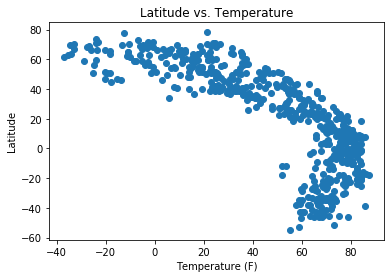

In [8]:
#Plot
plt.scatter(clean_cities_df['temp'], clean_cities_df['lat'])

#Labels, etc
plt.title('Latitude vs. Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Latitude')

This plot charts latitude vs current temperature (as of ~12pm 2/2/2021) for the randomly selected cities. Based on the plot generated, the northermost cities (30 degrees or more) have the coolest temperatures, while those around 5 to -5 degrees have the warmest temeratures. There is then a slight dip at the southernmost latitudes. This is what we would expect given how the seasons are distributed over latitude this time of year.

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Latitude')

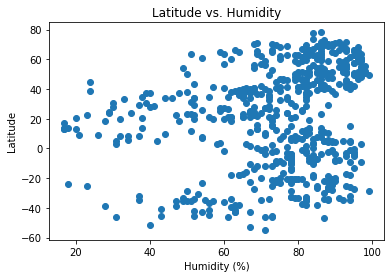

In [9]:
#Plot
plt.scatter(clean_cities_df['humidity'], clean_cities_df['lat'])

#Labels, etc
plt.title('Latitude vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

This plot charts latitude vs current temperature (as of ~12pm 2/2/2021) for the randomly selected cities. Based on the plot generated, there appears to be a slight positive correlation between latitudes and humidity, with many of the data points trending towards high latitude-high humidity. This relationship is not clear cut, however, as many mid-lower (10 to -30 degrees) also have relatively high humidity levels. The lowest humidity seems to cluster around 10 to 30 and -30 to -50 degrees. 

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Latitude')

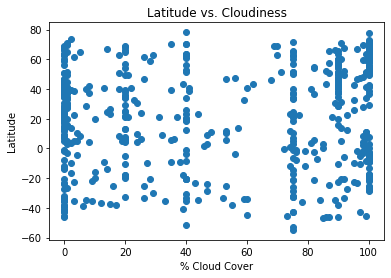

In [10]:
#Plot
plt.scatter(clean_cities_df['clouds'], clean_cities_df['lat'])

#Labels, etc
plt.title('Latitude vs. Cloudiness')
plt.xlabel('% Cloud Cover')
plt.ylabel('Latitude')

This plot charts latitude vs cloudiness (% cloud cover) (as of ~12pm 2/2/2021) for the randomly selected cities. Based on the plot generated, there is no clear relationship between cloud cover and latitude. There seems to be an equal distribution of 0% and 100% cloudiness at most latitudes, suggesting these variables are independent of one another.

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Latitude')

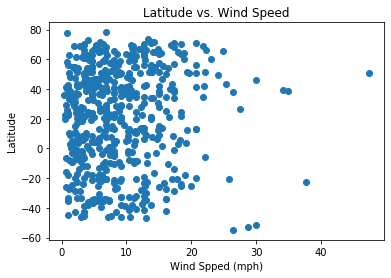

In [11]:
#Plot
plt.scatter(clean_cities_df['wind'], clean_cities_df['lat'])

#Labels, etc
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Wind Spped (mph)')
plt.ylabel('Latitude')

This plot charts latitude vs wind spped (mph) (as of ~12pm 2/2/2021) for the randomly selected cities. Based on the plot generated, there is no clear relationship between wind speend and latitude. Most cities have wind speeds of less than 15 miles per hour, and outliers can be seen at various latitudes. 

## Linear Regression

In [12]:
#Filter to northern latitudes only
#Northern df also includes where lat = 0
northern_lats = clean_cities_df.loc[clean_cities_df['lat'] >= 0, :]

#Filter to southern latitudes only
southern_lats = clean_cities_df.loc[clean_cities_df['lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(35, 75, 'y = -0.57x + 61.26')

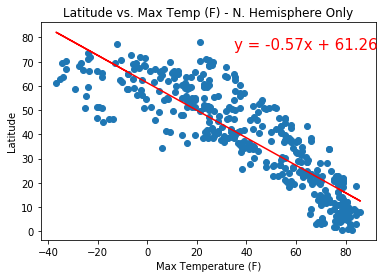

In [13]:
#Calculations for finding the components of the regression line
x_values = northern_lats['max_temp']
y_values = northern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Max Temp (F) - N. Hemisphere Only')
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(35, 75),fontsize=15,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(73, -53, 'y = 0.87x + -86.14')

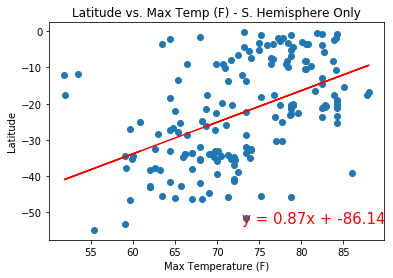

In [14]:
#Calculations for finding the components of the regression line
x_values = southern_lats['max_temp']
y_values = southern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Max Temp (F) - S. Hemisphere Only')
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(73, -53),fontsize=15,color="red")

For the above plots of temperature vs latitude, the linear regression shows a clear negative correlation betwenn temperature and latitude in the northern hemisphere (temperature increases as latitude declines). In the southern hemisphere, the regression line is positive, but the correlation is clearly weaker. This is expected given that, at this time of year (mid-late winter) the sun's energy is distibuted more across the southern hemisphere, but moving towards the northern hemisphere as the spring equinox approaches.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(15, 60, 'y = 0.46x + 4.64')

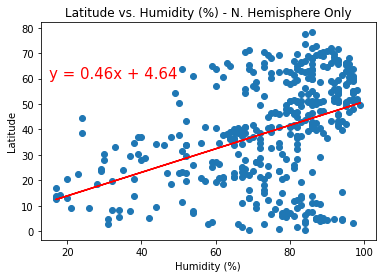

In [15]:
#Calculations for finding the components of the regression line
x_values = northern_lats['humidity']
y_values = northern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Humidity (%) - N. Hemisphere Only')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(15, 60),fontsize=15,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(20, -53, 'y = 0.4x + -52.47')

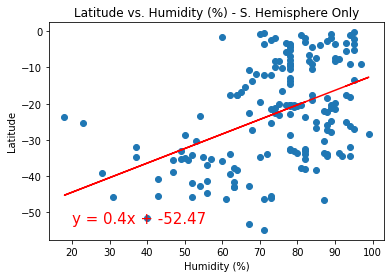

In [16]:
#Calculations for finding the components of the regression line
x_values = southern_lats['humidity']
y_values = southern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Humidity (%) - S. Hemisphere Only')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(20, -53),fontsize=15,color="red")

For the above plots of humidity vs latitude, the linear regression shows a positive correlation in both hemispheres (humidity increases as latitude increeases) though the relationship is relatively weak. Interestingly, the regressioons have abpout the same slope (so roughly the same correlation) even though the lines start at very different y-intercepts. This indicates that there is some shift around the equator that has distictly higher humidity south of the equator and distinctly lower humidities to the north. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(6, 75, 'y = 0.15x + 31.63')

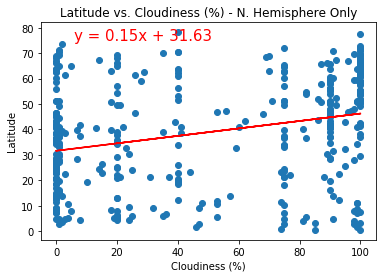

In [17]:
#Calculations for finding the components of the regression line
x_values = northern_lats['clouds']
y_values = northern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Cloudiness (%) - N. Hemisphere Only')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(6, 75),fontsize=15,color="red")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(4, -53, 'y = 0.09x + -27.42')

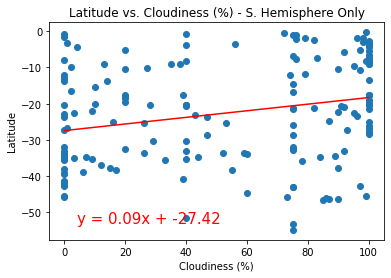

In [18]:
#Calculations for finding the components of the regression line
x_values = southern_lats['clouds']
y_values = southern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Cloudiness (%) - S. Hemisphere Only')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(4, -53),fontsize=15,color="red")

For the above plots of cloudiness (% cloud cover) vs latitude, the linear regression shows no clear relationship between cloud cover and latitude. Both regression slopes are very close to zero, which would indicate no relationship whatsoever between the two variables. This trend is observed in both hemispheres. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(14, 75, 'y = 0.35x + 35.88')

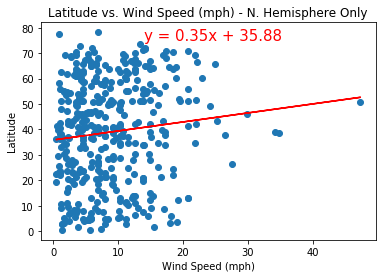

In [19]:
#Calculations for finding the components of the regression line
x_values = northern_lats['wind']
y_values = northern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Wind Speed (mph) - N. Hemisphere Only')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(14, 75),fontsize=15,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(21, -40, 'y = -0.39x + -19.29')

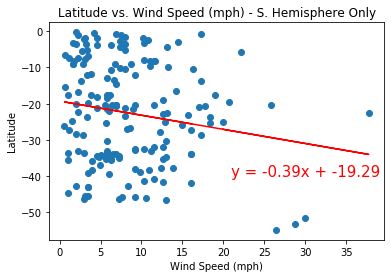

In [20]:
#Calculations for finding the components of the regression line
x_values = southern_lats['wind']
y_values = southern_lats['lat']

#Get values for the regression line for plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype('float'), y_values.astype('float'))
regress_values = x_values * slope + intercept

#Get equation for the linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter and regression line over the top
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Labels, etc
plt.title('Latitude vs. Wind Speed (mph) - S. Hemisphere Only')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')

#Put equation on the plot
plt.annotate(line_eq,(21, -40),fontsize=15,color="red")

For the above plots of wind speed (mph) vs latitude, the linear regression shows a negative correlation in the southern hemisphere and a positive correlation in the northern hemisphere. However, since most all of the data is clustered below 20 mph, these trend lines are clearly influenced on the presence of outliers, not on actual observable trends. These regression lines would likely do a poor job of predicting any weather outcomes. 